In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

This code was reference from prof.LechGrzelak

https://github.com/LechGrzelak

In [54]:
# Generate random variables of N by M normal distribution
npath = 100
nstep = 365
Z = np.random.normal(0.0,1.0,[npath,nstep])
print(Z[:2,:10])
print(np.shape(Z))

[[ 1.48783221  0.73217049  0.59946009 -0.89424852  0.11761573 -1.3481244
   0.21592597 -1.06639131  0.15601468 -0.60281455]
 [ 0.85649942 -1.39993237  0.76015772  0.20086997  1.26935231  0.75808614
   1.50350054  0.69269541  0.42349301 -0.26055044]]
(100, 365)


In [55]:

S_0 = 1
T = 1
drift = 0.1
vol = 0.3

# Make room for t = 0
X = np.zeros([npath,nstep + 1])
S = np.zeros([npath,nstep + 1])
time = np.zeros([nstep + 1])

X[:,0] = np.log(S_0)

dt = T/float(nstep)

for i in range(0,nstep):
    X[:,i+1] = X[:,i] + (drift - 0.5 * vol * vol) * dt + vol * np.power(dt,0.5) * Z[:,i]
    time[i+1] = time[i] + dt

S = np.exp(X)
paths = {"time":time,"X":X,"S":S}


Text(0, 0.5, 'S(t)')

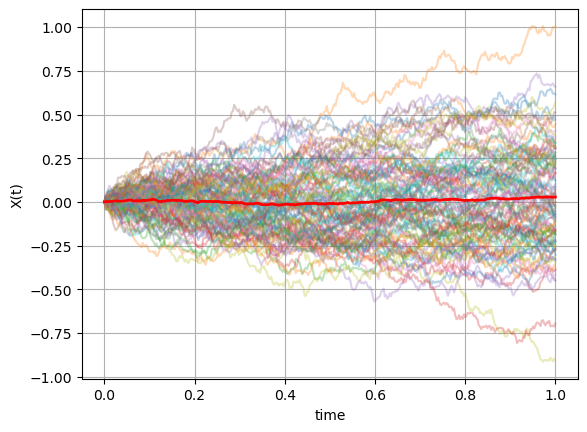

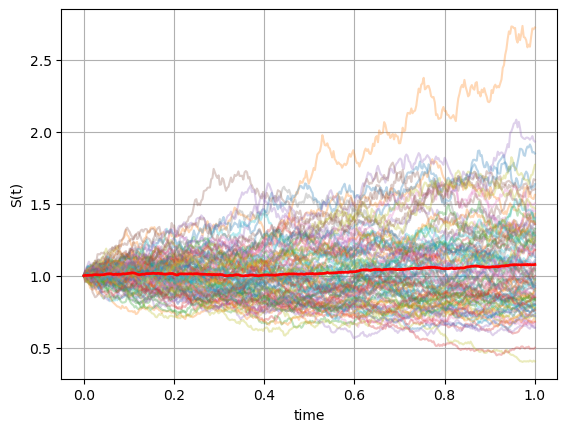

In [56]:
time_grid = paths["time"]
X_path = paths["X"]
S_path = paths["S"]

mean_X = np.mean(X_path, axis=0) 
mean_S = np.mean(S_path, axis=0)

plt.figure(1)
# Each column should be the y-value of one curve when we use plt.plot
# However, n by m simulation means each rows are y value of single path 
plt.plot(time_grid, np.transpose(X_path),alpha=0.3, label="Paths")
plt.plot(time_grid, mean_X, color='red', linewidth=2, label="Mean path")
plt.grid()
plt.xlabel("time")
plt.ylabel("X(t)")

plt.figure(2)
plt.plot(time_grid, np.transpose(S_path),alpha=0.3, label="Paths")
plt.plot(time_grid, mean_S, color='red', linewidth=2, label="Mean path")
plt.grid()
plt.xlabel("time")
plt.ylabel("S(t)")


In [61]:
np.shape(np.squeeze(np.transpose(X[1,:])))

(366,)

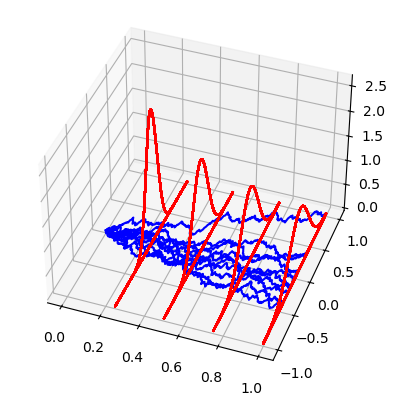

In [77]:
plt.figure(1)
ax = plt.axes(projection='3d')
# start paths from z = 0
zline = np.zeros([len(time_grid),1])
n = 10
for i in range(0,n):
    y1 = np.squeeze(np.transpose(X[i,:]))  # reduce dim for single path
    x1 = time_grid                          
    z1 = np.squeeze(zline)                 # z = 0
    ax.plot3D(x1, y1, z1, 'blue')
ax.view_init(elev=40, azim=-70) 

Ti = np.linspace(0,T,5) # generate 5 pdfs 
normPDF = lambda x,t :  st.norm.pdf(x, np.log(S_0) + (drift - 0.5 * vol * vol)*t, np.sqrt(t) * vol)
y1 = np.linspace(np.log(S_0)-1,np.log(S_0)+1,100) # x values of pdf
for ti in Ti:
    x1 = np.zeros([len(y1),1]) + ti
    z1 = normPDF(y1,ti)
    ax.plot3D(x1, y1, z1, 'red')

In [3]:
def GBM_Path_Generate(npath,nstep,T,drift,vol,S_0):
    Z = np.random.normal(0.0,1.0,[npath,nstep])
    X = np.zeros([npath,nstep + 1])
    S = np.zeros([npath, nstep+1])
    time = np.zeros([nstep + 1])

    X[:,0] = np.log(S_0)
    dt = float(T/nstep)

    for i in range(0,nstep):
        X[:,i+1] = X[:,i] + (drift - 0.5 * vol * vol)* dt + vol * np.sqrt(dt) * Z[:,i]
        time[i + 1] = time[i] + dt
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths


In [32]:
npath = 10000
nstep = 365
T = 1
drift = 0.0
vol = 0.3
S0 = 1


paths = GBM_Path_Generate(npath,nstep,T,drift,vol,S0)

In [33]:
print(np.mean(paths['X'][:,-1]))
print((drift - 0.5 * vol * vol)* T)

-0.044529427906940595
-0.045


In [34]:
print(np.mean(paths['S'][:,-1]))
print(np.exp(drift * T))

1.000429496535312
1.0


Text(0, 0.5, 'S(t)')

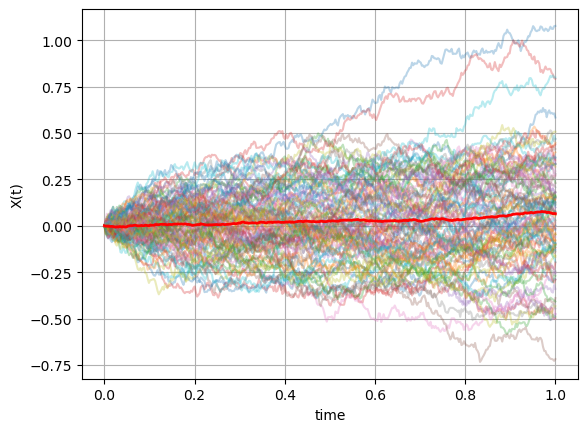

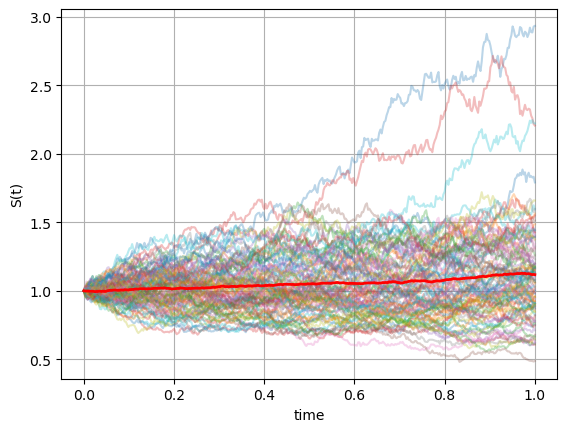

In [83]:
time_grid = paths["time"]
X_path = paths["X"]
S_path = paths["S"]

mean_X = np.mean(X_path, axis=0) 
mean_S = np.mean(S_path, axis=0)

plt.figure(1)
# Each column should be the y-value of one curve when we use plt.plot
# However, n by m simulation means each rows are y value of single path 
plt.plot(time_grid, np.transpose(X_path),alpha=0.3, label="Paths")
plt.plot(time_grid, mean_X, color='red', linewidth=2, label="Mean path")
plt.grid()
plt.xlabel("time")
plt.ylabel("X(t)")

plt.figure(2)
plt.plot(time_grid, np.transpose(S_path),alpha=0.3, label="Paths")
plt.plot(time_grid, mean_S, color='red', linewidth=2, label="Mean path")
plt.grid()
plt.xlabel("time")
plt.ylabel("S(t)")